# CNN for Disease Identification
### Accuracy - 94.6%

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
# Importing Deep Learning Libraries
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

In [5]:
picture_size = 48
folder_path = "./Grape-Dataset"

In [6]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path + "/train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path + "/valid",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 7222 images belonging to 4 classes.
Found 1805 images belonging to 4 classes.


In [7]:
no_of_classes = 4

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))




opt = Adam(learning_rate = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

In [8]:
# from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 10

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

C:\Users\akshi\AppData\Roaming\Python\Python37\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [9]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

C:\Users\akshi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
56/56 [==============================] - 281s 5s/step - loss: 0.6206 - accuracy: 0.7626 - val_loss: 26.3146 - val_accuracy: 0.2679 - lr: 0.0010
Epoch 2/10
56/56 [==============================] - 172s 3s/step - loss: 0.4207 - accuracy: 0.8361 - val_loss: 9.8872 - val_accuracy: 0.3075 - lr: 0.0010
Epoch 3/10
56/56 [==============================] - 165s 3s/step - loss: 0.3580 - accuracy: 0.8602 - val_loss: 1.4417 - val_accuracy: 0.6641 - lr: 0.0010
Epoch 4/10
56/56 [==============================] - 167s 3s/step - loss: 0.2957 - accuracy: 0.8857 - val_loss: 1.1224 - val_accuracy: 0.7193 - lr: 0.0010
Epoch 5/10
56/56 [==============================] - 164s 3s/step - loss: 0.2609 - accuracy: 0.8960 - val_loss: 0.8433 - val_accuracy: 0.7232 - lr: 0.0010
Epoch 6/10
56/56 [==============================] - 177s 3s/step - loss: 0.2230 - accuracy: 0.9096 - val_loss: 2.2604 - val_accuracy: 0.6936 - lr: 0.0010
Epoch 7/10
56/56 [==============================] - 181s 3s/step - loss: 0.

In [10]:
model.save('diseased-plant.model')

INFO:tensorflow:Assets written to: diseased-plant.model\assets


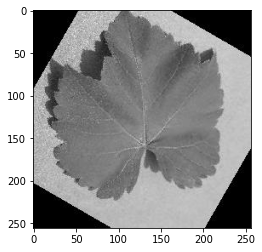

[1.4058876e-09 1.8358004e-12 5.3275435e-14 1.0000000e+00]
Identified:  Healthy



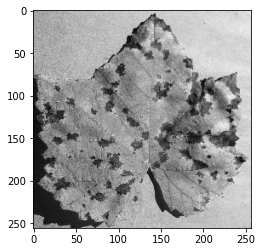

[4.3960058e-10 6.0164339e-11 1.0000000e+00 3.1446754e-10]
Identified:  Leaf_blight



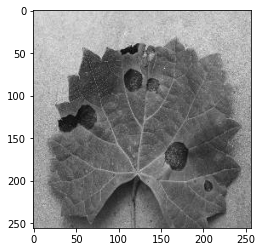

[9.7345102e-01 2.6472209e-02 7.2597548e-05 4.0871946e-06]
Identified:  Black_rot



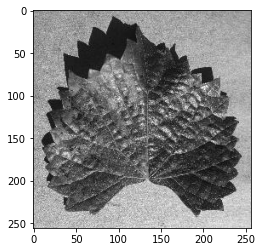

[9.9118007e-03 9.9008524e-01 2.8891966e-06 1.2959536e-07]
Identified:  Esca



In [13]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import tensorflow as tf

path = "./diseased-plant.model/trial"

Categories = ['Black_rot', 'Esca', 'Leaf_blight', 'Healthy']

def prepare(filepath):
    IMG_SIZE = 48
    
    img_arr = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_arr, cmap='gray')
    plt.show()  # display!
    new_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
    return new_arr.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

model = tf.keras.models.load_model("./diseased-plant.model")

for img in os.listdir(path): 
    if img!='.ipynb_checkpoints':
        img_path = os.path.join(path,img)
        img_array = cv2.imread(img_path ,cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')  
        prediction = model.predict([prepare(img_path)])
        print(prediction[0])
        print('Identified: ',Categories[np.argmax(prediction[0])],end = "\n\n")

In [14]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Y_pred = model.predict_generator(test_set, test_set.n//test_set.batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(test_set.classes, y_pred))

print('Classification Report')
target_names = ['Black_rot', 'Esca', 'Leaf_blight', 'Healthy']
print(classification_report(test_set.classes, y_pred, target_names=target_names))

C:\Users\akshi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  after removing the cwd from sys.path.


Confusion Matrix
[[410  47   9   6]
 [ 56 414   9   1]
 [  5   5 420   0]
 [  0   0   5 418]]
Classification Report
              precision    recall  f1-score   support

   Black_rot       0.87      0.87      0.87       472
        Esca       0.89      0.86      0.88       480
 Leaf_blight       0.95      0.98      0.96       430
     Healthy       0.98      0.99      0.99       423

    accuracy                           0.92      1805
   macro avg       0.92      0.92      0.92      1805
weighted avg       0.92      0.92      0.92      1805



In [15]:
cf_matrix = confusion_matrix(test_set.classes, y_pred)

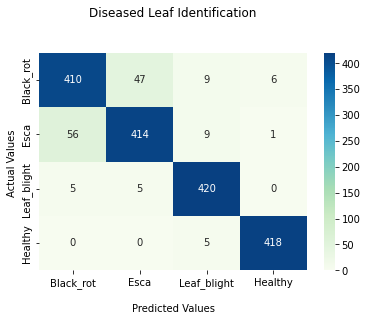

In [23]:
import seaborn as sb

ax = sb.heatmap(cf_matrix, annot=True, fmt = "d", cmap='GnBu')

ax.set_title('Diseased Leaf Identification\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Black_rot', 'Esca', 'Leaf_blight', 'Healthy'])
ax.yaxis.set_ticklabels(['Black_rot', 'Esca', 'Leaf_blight', 'Healthy'])

## Display the visualization of the Confusion Matrix.
plt.show()